<html>
    <h1>HOTEL BOOKING PREDICTION</h1>
    </HTML>

<h2> importing all libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
data = pd.read_excel("C:/Users/Dell/Downloads/HotelFinalDataset.xlsx",na_values=None)
data.head()

,Unnamed: 0,Name,Place,Type,Price,ReviewsCount,Rating,City,State
0,0,BUNK Hotel Amsterdam,"Amsterdam Noord, Amsterdam",Bunk Pod for 2,"₹ 7,887",778.0,8.4,Amsterdam Noord,Amsterdam
1,1,YOTEL Amsterdam,"Amsterdam Noord, Amsterdam",Premium Double Room,"₹ 15,267",500.0,8.1,Amsterdam Noord,Amsterdam
2,2,Multatuli Hotel,"Amsterdam City Center, Amsterdam",Double Room,"₹ 13,063",1605.0,7.4,Amsterdam City Center,Amsterdam
3,3,nhow Amsterdam Rai,"Zuideramstel, Amsterdam",nhow Double or Twin Room with View,"₹ 12,854",500.0,9.0,Zuideramstel,Amsterdam
4,4,Motel One Amsterdam,"Zuideramstel, Amsterdam",Double Room,"₹ 9,471",500.0,8.8,Zuideramstel,Amsterdam


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    525 non-null    int64  
 1   Name          525 non-null    object 
 2   Place         525 non-null    object 
 3   Type          525 non-null    object 
 4   Price         525 non-null    object 
 5   ReviewsCount  512 non-null    float64
 6   Rating        515 non-null    float64
 7   City          525 non-null    object 
 8   State         133 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 37.0+ KB


In [4]:
data.columns

Index(['Unnamed: 0', 'Name', 'Place', 'Type', 'Price', 'ReviewsCount',
       'Rating', 'City', 'State'],
      dtype='object')

In [5]:
data.dtypes

Unnamed: 0        int64
Name             object
Place            object
Type             object
Price            object
ReviewsCount    float64
Rating          float64
City             object
State            object
dtype: object

In [6]:
data.describe()

,Unnamed: 0,ReviewsCount,Rating
count,525.000000,512.000000,515.000000
mean,262.000000,736.556641,8.331456
std,151.698715,879.553639,0.711974
min,0.000000,1.000000,3.700000
25%,131.000000,239.000000,8.000000
50%,262.000000,500.000000,8.400000
75%,393.000000,888.000000,8.800000
max,524.000000,7748.000000,10.000000


<h2>Detecting null values</h2>

In [7]:
data.isnull().sum()

Unnamed: 0        0
Name              0
Place             0
Type              0
Price             0
ReviewsCount     13
Rating           10
City              0
State           392
dtype: int64

In [8]:
null_values=(data.isnull().mean())*100


In [9]:
df=pd.DataFrame(null_values)

In [10]:
df.style.highlight_max(color='yellow').highlight_min(color='blue')

,0
Unnamed: 0,0.000000
Name,0.000000
Place,0.000000
Type,0.000000
Price,0.000000
ReviewsCount,2.476190
Rating,1.904762
City,0.000000
State,74.666667


<h2>Dropping unnamed column</h2>

In [11]:
data.drop(columns='Unnamed: 0',inplace=True)

In [12]:
data.State.mode()

0     Amsterdam
1     Rotterdam
Name: State, dtype: object

<h2>replacing null values with mean</h2>

In [13]:
data.State.fillna('others',inplace=True)
data.ReviewsCount.fillna('736.556641',inplace=True)
data.Rating.fillna('8.331456',inplace=True)



In [14]:
data.isnull().sum()

Name            0
Place           0
Type            0
Price           0
ReviewsCount    0
Rating          0
City            0
State           0
dtype: int64

In [15]:
uniq_value = pd.DataFrame({'Unique_Values':data.nunique()})
uniq_value.style.background_gradient()

,Unique_Values
Name,522
Place,50
Type,190
Price,358
ReviewsCount,306
Rating,41
City,50
State,7


In [16]:
data['Price']

0       ₹ 7,887
1      ₹ 15,267
2      ₹ 13,063
3      ₹ 12,854
4       ₹ 9,471
         ...   
520     ₹ 8,899
521    ₹ 10,205
522     ₹ 6,123
523     ₹ 7,789
524     ₹ 6,870
Name: Price, Length: 525, dtype: object

In [17]:
data['Price'] = data['Price'].str.replace('₹','')
data['Price'] = data['Price'].str.replace(' ','')
data['Price'] = data['Price'].str.replace(',','')
data['Price'] = data['Price'].astype(int)

In [30]:
data.Price

0       7887
1      15267
2      13063
3      12854
4       9471
       ...  
520     8899
521    10205
522     6123
523     7789
524     6870
Name: Price, Length: 525, dtype: int32

In [18]:
data.dtypes

Name            object
Place           object
Type            object
Price            int32
ReviewsCount    object
Rating          object
City            object
State           object
dtype: object

In [19]:
value_count = pd.DataFrame({'City_Valuecount':data['City'].value_counts()})
value_count.style.background_gradient(cmap='hot')

,City_Valuecount
Groningen,25
Valkenburg,25
Voorthuizen,25
Vlissingen,25
Bemelen,25
Middelburg,25
Haarlem,25
Den Bosch,23
Scheveningen,22
Zwolle,21


In [20]:
value_count = pd.DataFrame({'State_Valuecount':data['State'].value_counts()})
value_count.style.background_gradient(cmap='icefire')

,State_Valuecount
others,392
Amsterdam,25
Rotterdam,25
Eindhoven,24
Utrecht,23
The Hague,21
Maastricht,15


In [21]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Type']= label_encoder.fit_transform(data['Type'])
  
data['Type'].unique()

array([ 13, 107,  62, 189, 169, 119,  92, 124, 101, 174, 158, 112, 132,
        74,  27,   1, 126, 142,  20,  87, 186,  70, 184, 102, 121,  68,
       166, 152,  36,  49, 140,  26, 143, 157, 161, 182,  41,  84, 120,
         0,   7, 127,  47, 163, 134, 145,  45, 155,  24,  28,  59,  22,
       173,  42,  57, 175,  51, 135,  99, 165, 115,  34,  10, 137, 170,
        32,  40,   5, 167,  18, 111,  56,  53, 162, 178,  21,  90, 153,
        76, 114, 110,   9,  96,  72, 148, 168, 113, 160,  33, 141, 150,
       187,  80,  23,  25, 138,  97, 136, 131,  15, 104,  48,  54,  73,
       156, 105,  61, 118, 100,  44, 108,   3,  30,  38,  95,  31,  94,
        60,  79,  82,  86,  89, 122,  12,  55,  52,  65, 146, 149, 147,
        50, 139,  35,  78,  93, 181,  69, 117,  67,  63, 171,  88,  75,
         8,  66,  83,   4, 123, 179,  37,  19, 106, 151,  46,  29,  17,
       176, 144,  14, 188,  43, 129, 130, 109,  81, 180,  11,  98,  58,
        64,  39, 185, 116,   6, 125, 177,  16,  85,  77, 172, 10

In [22]:
data.dtypes

Name            object
Place           object
Type             int32
Price            int32
ReviewsCount    object
Rating          object
City            object
State           object
dtype: object


<h2> EDA</h2>

<AxesSubplot:title={'center':'Price vs Rating in Different state'}, xlabel='Price', ylabel='Rating'>

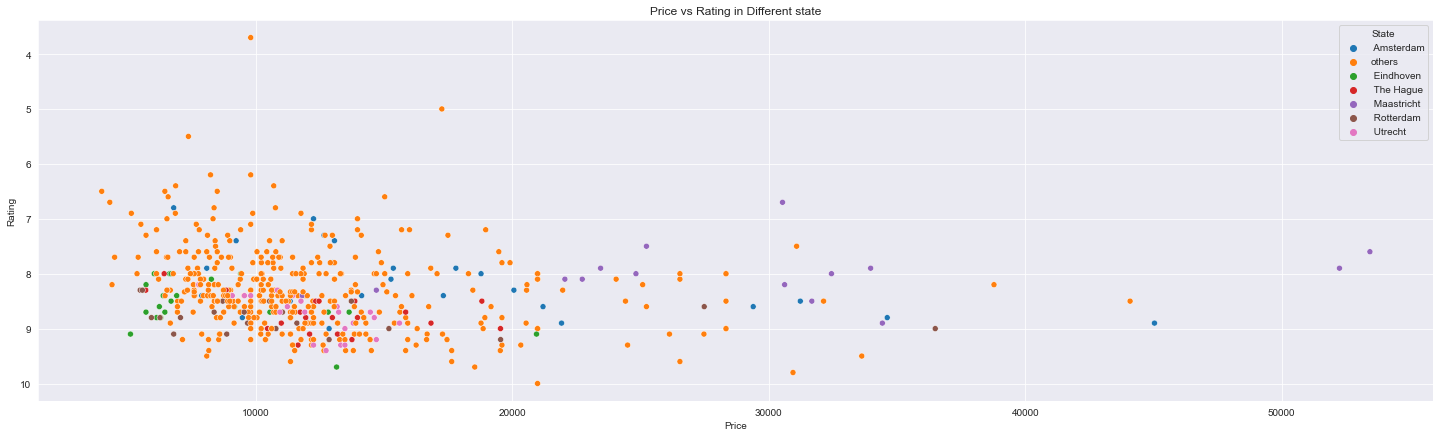

In [23]:
plt.figure(figsize=(25,7))
plt.title('Price vs Rating in Different state')
sns.scatterplot(x=data['Price'],y=data['Rating'],data = data,hue='State')

<AxesSubplot:title={'center':'Price vs ReviewsCount in Different state'}, xlabel='Price', ylabel='ReviewsCount'>

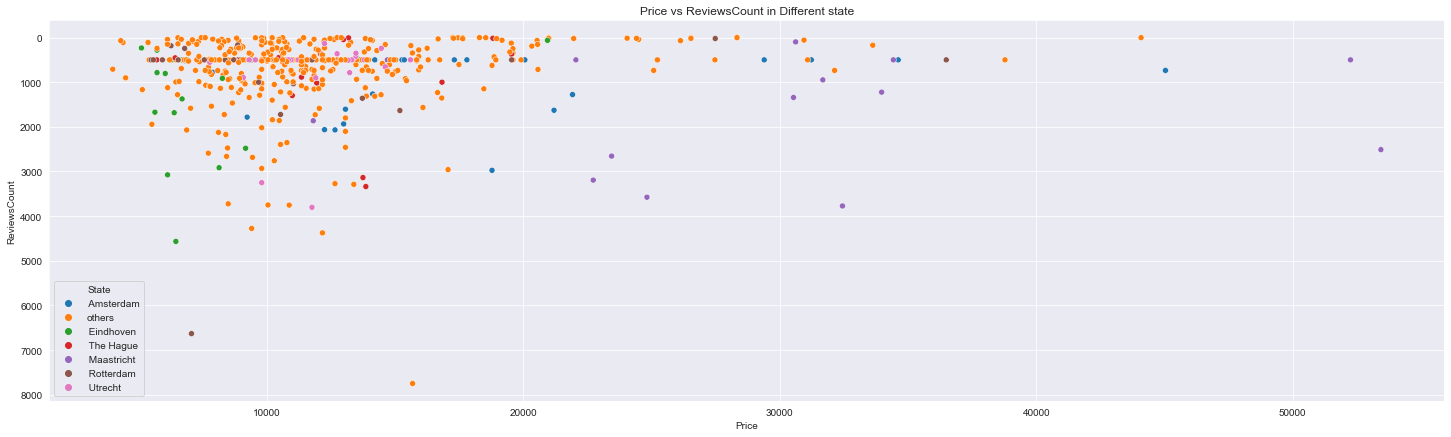

In [24]:
plt.figure(figsize=(25,7))
plt.title('Price vs ReviewsCount in Different state')
sns.scatterplot(x=data['Price'],y=data['ReviewsCount'],data = data,hue='State')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'Amsterdam Noord'),
  Text(1, 0, 'Amsterdam City Center'),
  Text(2, 0, 'Zuideramstel'),
  Text(3, 0, 'Oud Zuid'),
  Text(4, 0, 'Oost'),
  Text(5, 0, 'Oud West'),
  Text(6, 0, 'Bemelen'),
  Text(7, 0, 'Breda'),
  Text(8, 0, 'Delft'),
  Text(9, 0, 'Den Bosch'),
  Text(10, 0, 'Strijp'),
  Text(11, 0, 'Eindhoven City Centre'),
  Text(12, 0, 'Stratum'),
  Text(13, 0, 'Eindhoven'),
  Text(14, 0, 'Woensel-Zuid'),
  Text(15, 0, 'Tongelre'),
  Text(16, 0, 'Groningen'),
  Text(17, 0, 'Haarlem'),
  Text(18, 0, 'The Hague'),
  Text(19, 0, 'The Hague City Centre'),
  Text(20, 0, 'Laak'),
  Text(21, 0, 'Haagse Hout'),
  Text(22, 0, 'Segbroek'),
  Text(23, 0, 'Hoofddorp'),
  Text(24, 0, 'Leeuwarden'),
  Text(25, 0, 'Maastricht'),
  Text(26, 0, 'Wijck'),
  Text(27, 

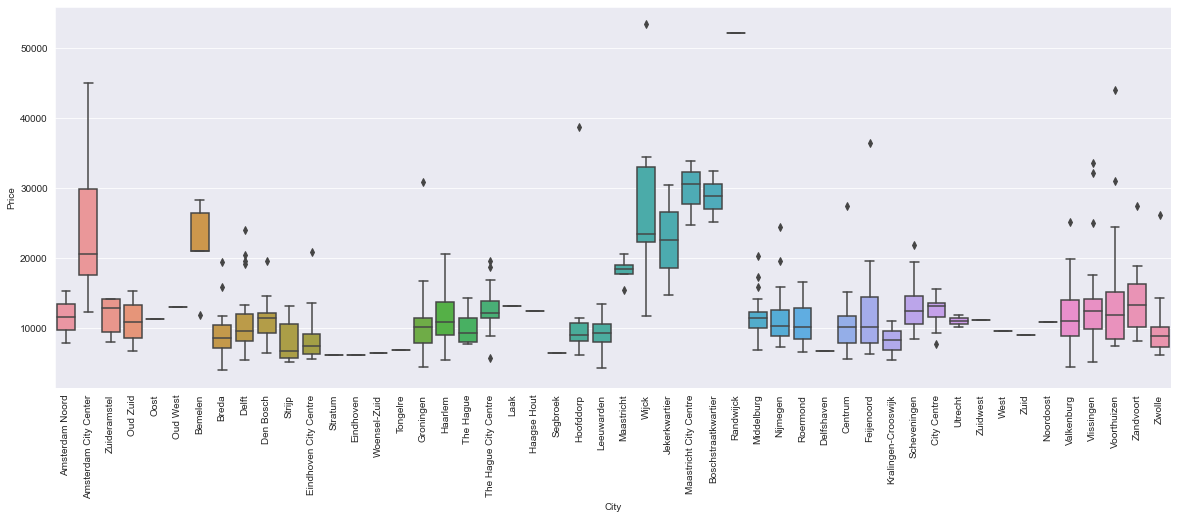

In [25]:
plt.figure(figsize=(20,7))
sns.boxplot(x=data['City'],y=data['Price'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='State', ylabel='Price'>

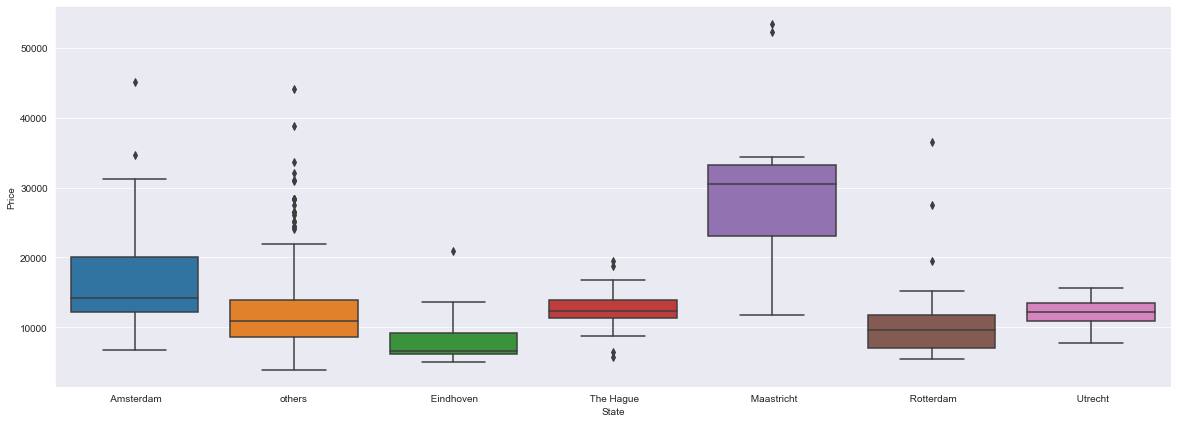

In [26]:
plt.figure(figsize=(20,7))
sns.boxplot(x=data['State'],y=data['Price'])

<AxesSubplot:>

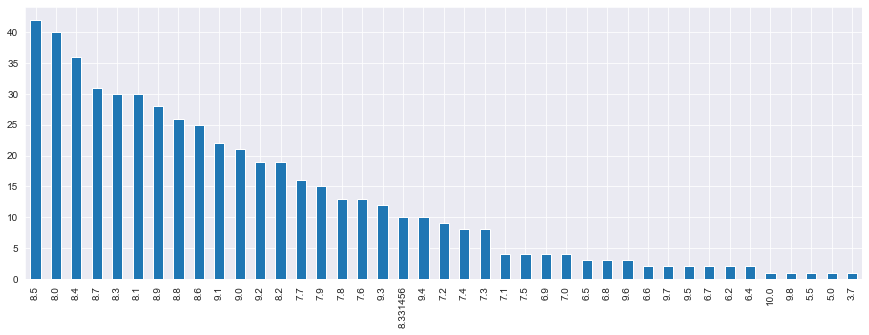

In [62]:
plt.figure(figsize=(15,5))
data['Rating'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Rating', ylabel='Price'>

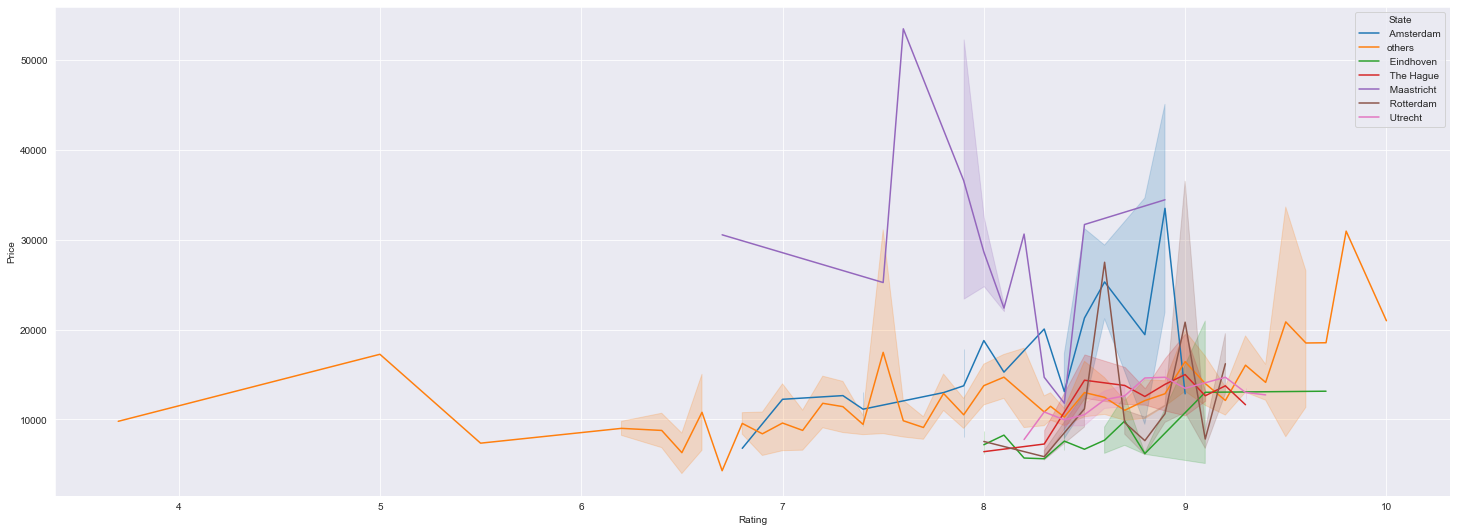

In [28]:
plt.figure(figsize=(25,9))
sns.lineplot(data=data,y=data['Price'],x=data['Rating'],hue='State')

In [32]:

data=data.astype({"ReviewsCount":float},errors='ignore')


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='ReviewsCount'>

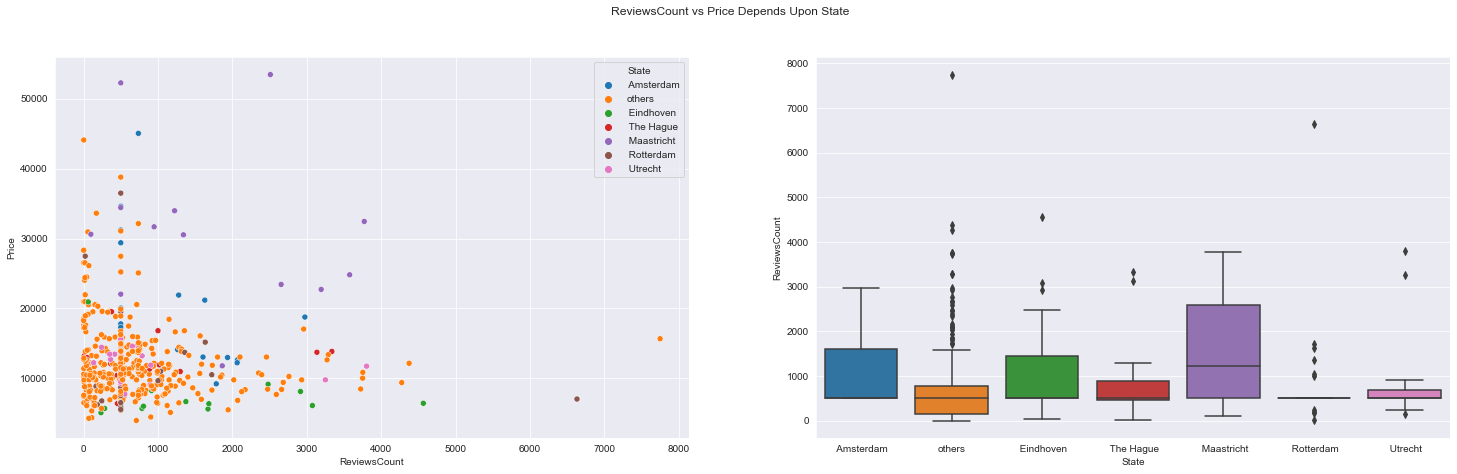

In [33]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(25,7))
fig.suptitle("ReviewsCount vs Price Depends Upon State")
sns.scatterplot(data['ReviewsCount'],data['Price'],data = data,hue='State',ax=ax1)
sns.boxplot(x=data['State'],y=data['ReviewsCount'],ax=ax2)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'Amsterdam Noord'),
  Text(1, 0, 'Amsterdam City Center'),
  Text(2, 0, 'Zuideramstel'),
  Text(3, 0, 'Oud Zuid'),
  Text(4, 0, 'Oost'),
  Text(5, 0, 'Oud West'),
  Text(6, 0, 'Bemelen'),
  Text(7, 0, 'Breda'),
  Text(8, 0, 'Delft'),
  Text(9, 0, 'Den Bosch'),
  Text(10, 0, 'Strijp'),
  Text(11, 0, 'Eindhoven City Centre'),
  Text(12, 0, 'Stratum'),
  Text(13, 0, 'Eindhoven'),
  Text(14, 0, 'Woensel-Zuid'),
  Text(15, 0, 'Tongelre'),
  Text(16, 0, 'Groningen'),
  Text(17, 0, 'Haarlem'),
  Text(18, 0, 'The Hague'),
  Text(19, 0, 'The Hague City Centre'),
  Text(20, 0, 'Laak'),
  Text(21, 0, 'Haagse Hout'),
  Text(22, 0, 'Segbroek'),
  Text(23, 0, 'Hoofddorp'),
  Text(24, 0, 'Leeuwarden'),
  Text(25, 0, 'Maastricht'),
  Text(26, 0, 'Wijck'),
  Text(27, 

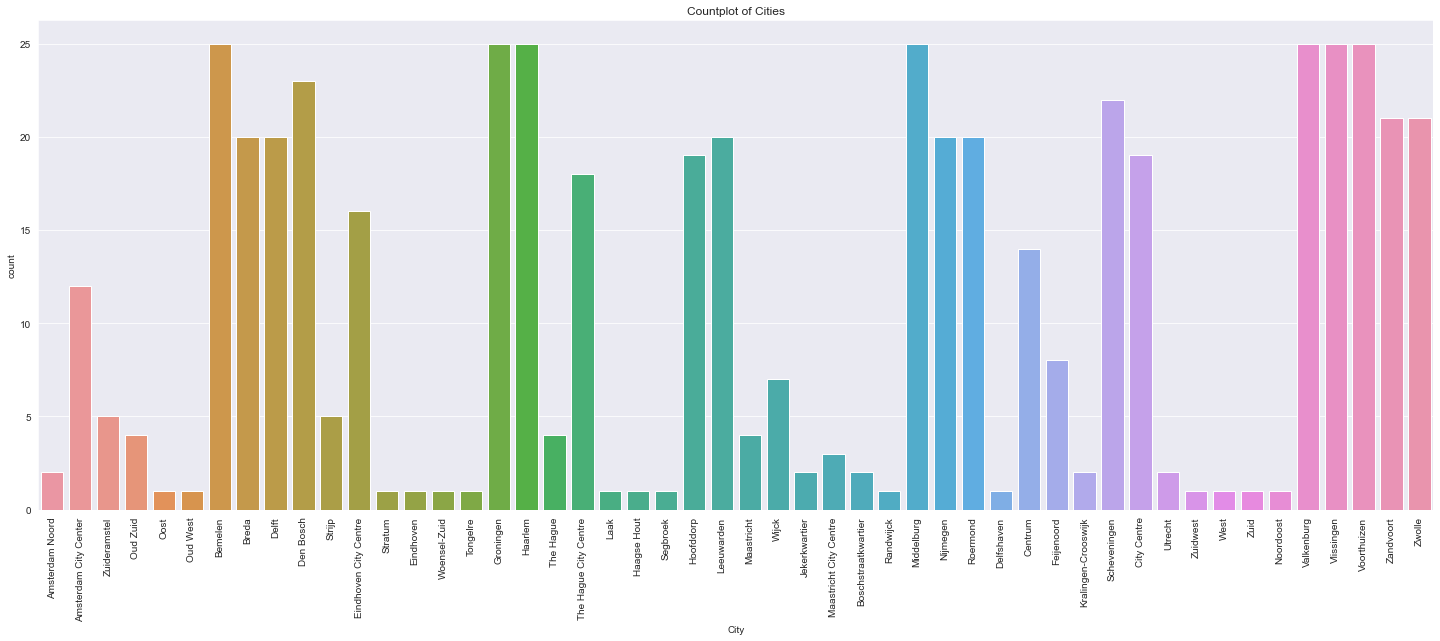

In [34]:
plt.figure(figsize=(25,9))
plt.title("Countplot of Cities")
sns.countplot(data['City'])
plt.xticks(rotation=90)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

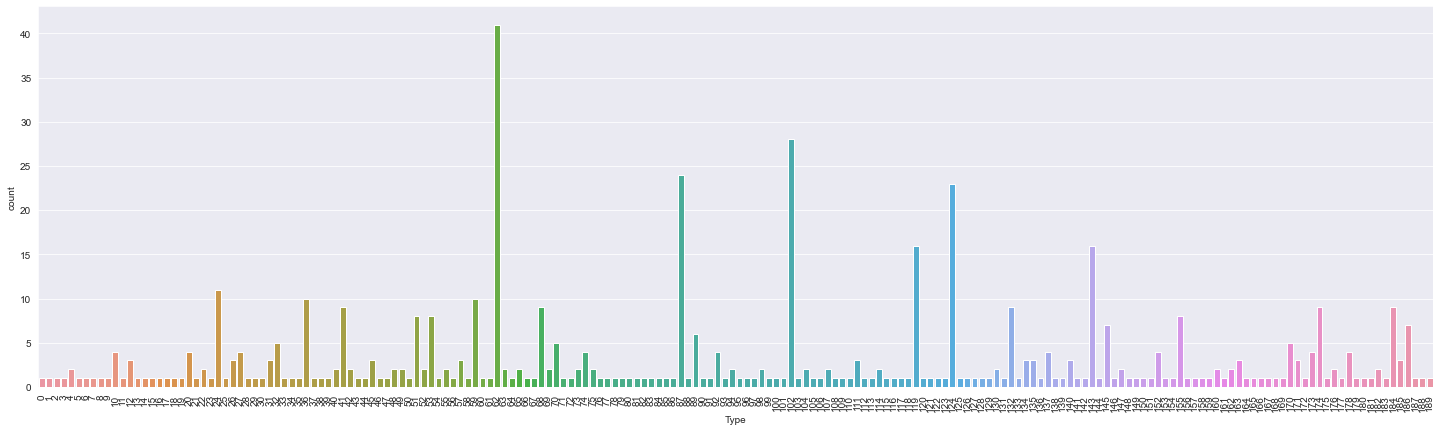

In [35]:
plt.figure(figsize=(25,7))
plt.xticks(rotation=90)
sns.countplot(data['Type'])

<h2> AgglomerativeClustering</h2>

In [36]:

iy=data.iloc[:,2:6].values
iy

array([[13, 7887, 778.0, 8.4],
       [107, 15267, 500.0, 8.1],
       [62, 13063, 1605.0, 7.4],
       ...,
       [68, 6123, 149.0, 7.2],
       [143, 7789, 1095.0, 7.2],
       [62, 6870, 2071.0, 6.4]], dtype=object)

In [37]:
pd.DataFrame(iy)

,0,1,2,3
0,13,7887,778.0,8.4
1,107,15267,500.0,8.1
2,62,13063,1605.0,7.4
3,189,12854,500.0,9.0
4,62,9471,500.0,8.8
...,...,...,...,...
520,154,8899,232.0,8.4
521,124,10205,1402.0,7.7
522,68,6123,149.0,7.2
523,143,7789,1095.0,7.2


In [38]:
from sklearn.cluster import AgglomerativeClustering

In [39]:
import scipy.cluster.hierarchy as sch

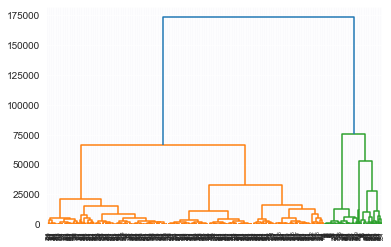

In [40]:
dendrogram = sch.dendrogram(sch.linkage(iy, method='ward'))

In [41]:
model = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward') 
model.fit(iy)


AgglomerativeClustering(n_clusters=3)

In [42]:
labels=model.labels_
labels

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0,

<h2> 3D VIEW OF CLUSTERS</h2>

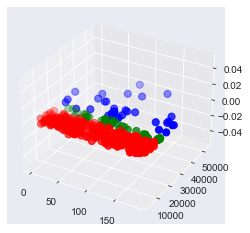

In [43]:
ax=plt.axes(projection='3d')
ax.scatter(iy[labels==0, 0], iy[labels==0, 1], s=50, marker='o', color='red')
ax.scatter(iy[labels==1, 0], iy[labels==1, 1], s=50, marker='o', color='blue')
ax.scatter(iy[labels==2, 0], iy[labels==2, 1], s=50, marker='o', color='green')


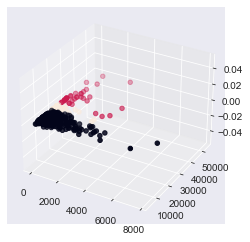

In [44]:
ax=plt.axes(projection='3d')
ax.scatter(data['ReviewsCount'],data['Price'],c=model.labels_)

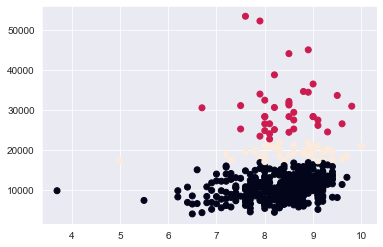

In [45]:

plt.scatter(data['Rating'],data['Price'],c=model.labels_)

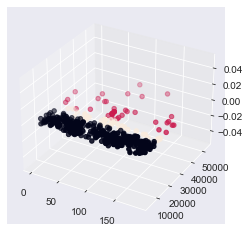

In [46]:
ax=plt.axes(projection='3d')
ax.scatter(data['Type'],data['Price'],c=model.labels_)

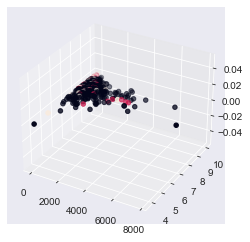

In [47]:
ax=plt.axes(projection='3d')
ax.scatter(data['ReviewsCount'],data['Rating'],c=model.labels_)

In [48]:

data=data.astype({"Rating":float},errors='ignore')


<h2>SORTING based on Rating</h2>
<h3> Ratings Greater than 9 </h3>

In [49]:
e=data[data.Rating>=9.0].sort_values(by='Rating',ascending=True)



In [50]:
e1=pd.DataFrame(e)


In [51]:
e1

,Name,Place,Type,Price,ReviewsCount,Rating,City,State
3,nhow Amsterdam Rai,"Zuideramstel, Amsterdam",189,12854,500.0,9.0,Zuideramstel,Amsterdam
189,COVE Centrum,"The Hague City Centre, The Hague",148,10454,451.0,9.0,The Hague City Centre,The Hague
188,Hotel Bries Den Haag - Scheveningen,The Hague,140,10568,303.0,9.0,The Hague,others
167,Boutique Hotel 't Vosje,Haarlem,162,18860,431.0,9.0,Haarlem,others
272,B&B Montancourt-Middelburg,Middelburg,174,10614,372.0,9.0,Middelburg,others
...,...,...,...,...,...,...,...,...
316,B&B N10,Roermond,51,11348,500.0,9.6,Roermond,others
113,"Hof, a luxury B&B in the center of Eindhoven","Strijp, Eindhoven",57,13145,500.0,9.7,Strijp,Eindhoven
252,Dormio Resort Maastricht Castellum Apartments,Maastricht,102,18533,3.0,9.7,Maastricht,others
139,Byonz,Groningen,186,30943,58.0,9.8,Groningen,others


<h3> Ratings greater than 8</h3>

In [52]:
e2=data[data.Rating>=8.0].sort_values(by='Rating',ascending=True)
e2

,Name,Place,Type,Price,ReviewsCount,Rating,City,State
365,Fletcher Hotel-Restaurant Scheveningen,Scheveningen,62,11757,937.0,8.0,Scheveningen,others
42,Holiday Home Green Resort Mooi Bemelen-33,Bemelen,87,20982,1.0,8.0,Bemelen,others
47,Holiday Home Green Resort Mooi Bemelen-3,Bemelen,87,26534,18.0,8.0,Bemelen,others
104,Landgoed Huize Bergen Den Bosch - Vught,Den Bosch,62,10238,500.0,8.0,Den Bosch,others
49,Holiday Home Green Resort Mooi Bemelen-12,Bemelen,87,28330,1.0,8.0,Bemelen,others
...,...,...,...,...,...,...,...,...
433,Zeilschip Lucia,Vlissingen,98,17635,5.0,9.6,Vlissingen,others
252,Dormio Resort Maastricht Castellum Apartments,Maastricht,102,18533,3.0,9.7,Maastricht,others
113,"Hof, a luxury B&B in the center of Eindhoven","Strijp, Eindhoven",57,13145,500.0,9.7,Strijp,Eindhoven
139,Byonz,Groningen,186,30943,58.0,9.8,Groningen,others


<h3> Ratings greater than 7</h3>

In [53]:
e3=data[data.Rating>=7.0].sort_values(by='Rating',ascending=True)
e3

,Name,Place,Type,Price,ReviewsCount,Rating,City,State
314,De Hemel De Kracht van Ambacht,Nijmegen,89,8328,94.0,7.0,Nijmegen,others
109,Mely's House,Den Bosch,42,6531,4.0,7.0,Den Bosch,others
431,Hotel Schaepkens van St Fijt,Valkenburg,124,13961,500.0,7.0,Valkenburg,others
21,The White Tulip Hostel,"Amsterdam City Center, Amsterdam",142,12246,2064.0,7.0,Amsterdam City Center,Amsterdam
230,Best Western Plus Amsterdam Airport Hotel,Hoofddorp,59,7674,500.0,7.1,Hoofddorp,others
...,...,...,...,...,...,...,...,...
316,B&B N10,Roermond,51,11348,500.0,9.6,Roermond,others
113,"Hof, a luxury B&B in the center of Eindhoven","Strijp, Eindhoven",57,13145,500.0,9.7,Strijp,Eindhoven
252,Dormio Resort Maastricht Castellum Apartments,Maastricht,102,18533,3.0,9.7,Maastricht,others
139,Byonz,Groningen,186,30943,58.0,9.8,Groningen,others


<html>
    <h1>PRICE analysis </html>

In [54]:
data['Price'].max()


53439

In [55]:
data['Price'].min()


3988

In [56]:
v1=data[data.Price>=35000].sort_values(by='Price',ascending=True)
v1

,Name,Place,Type,Price,ReviewsCount,Rating,City,State
342,Wikkelboat Nr5 at Floating Rotterdam Rijnhaven,"Feijenoord, Rotterdam",171,36489,500.000000,9.0,Feijenoord,Rotterdam
225,Wim's Place Amsterdam Airport / Hoofddorp,Hoofddorp,42,38780,500.000000,8.2,Hoofddorp,others
461,Voorde 16 pers. bungalow,Voorthuizen,77,44087,2.000000,8.5,Voorthuizen,others
9,Andaz Amsterdam Prinsengracht - a concept by H...,"Amsterdam City Center, Amsterdam",101,45038,736.556641,8.9,Amsterdam City Center,Amsterdam
268,NH Maastricht,"Randwijck, Maastricht",132,52252,500.000000,7.9,Randwijck,Maastricht
269,"Crowne Plaza Maastricht, an IHG Hotel","Wijck, Maastricht",79,53439,2510.000000,7.6,Wijck,Maastricht


In [57]:
v1=data[data.Price< 20000].sort_values(by='Price',ascending=True)
v1

,Name,Place,Type,Price,ReviewsCount,Rating,City,State
69,Premiere Classe Hotel Breda,Breda,62,3988,709.0,6.5,Breda,others
250,Studio in the city center of Leeuwarden,Leeuwarden,102,4303,71.0,6.7,Leeuwarden,others
154,"Eco-Camping De Helleborus, Yurt, Bell & Safari...",Groningen,167,4389,111.0,8.2,Groningen,others
420,Hotel Lahaye,Valkenburg,130,4490,903.0,7.7,Valkenburg,others
114,Eindhoven4you,"Strijp, Eindhoven",175,5108,234.0,9.1,Strijp,Eindhoven
...,...,...,...,...,...,...,...,...
341,Wikkelboat Nr1 at Floating Rotterdam Rijnhaven,"Feijenoord, Rotterdam",186,19542,500.0,9.2,Feijenoord,Rotterdam
93,Bossche Suites No2 - Verwersstraat,Den Bosch,145,19594,249.0,9.3,Den Bosch,others
76,De Vliegende Vos het geboortehuis van Johannes...,Delft,84,19594,347.0,8.8,Delft,others
313,Hotel De Gulden Waagen,Nijmegen,62,19594,500.0,7.8,Nijmegen,others


<html>
    <h2> GROUPING </html>

In [58]:
w=data.groupby('Name')['Rating'].mean().sort_values(ascending = False)
w

Name
Holiday Home Green Resort Mooi Bemelen-19        10.0
Byonz                                             9.8
Dormio Resort Maastricht Castellum Apartments     9.7
Hof, a luxury B&B in the center of Eindhoven      9.7
B&B N10                                           9.6
                                                 ... 
New City Hotel Scheveningen                       6.2
Pension Marco                                     6.2
Hotel Carillon                                    5.5
Verrassende Loft BNB centrum Middelburg           5.0
Cosy sailingboat in Vlissingen                    3.7
Name: Rating, Length: 522, dtype: float64

In [59]:
o=data.groupby('Price')['Rating'].mean().sort_values(ascending = False)
o

Price
30943    9.8
13145    9.7
18533    9.7
17635    9.5
33624    9.5
        ... 
3988     6.5
6870     6.4
8230     6.2
7368     5.5
17250    5.0
Name: Rating, Length: 358, dtype: float64

<html> EVALUATION

In [60]:
from sklearn.metrics import silhouette_score
silhouette_score(iy,labels)

0.5774777742379915

<HTML> 
    <H1> CONCLUSION</HTML>
    <h3>
        Hence the hotel recommendation system has been created succesfully using AGGLOMERATIVE CLUSTERING 